## TP5

Integrantes:
* Martín Fosco LU: 449/13
* Javier Minces LU: 231/13

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

### 1 - 

In [3]:
from collections import defaultdict

def run_ppc(trace, samples=100, model=None):
    """Generate Posterior Predictive samples from a model given a trace.
    """
    if model is None:
         model = pm.modelcontext(model)

    ppc = defaultdict(list)
    for idx in np.random.randint(0, len(trace), samples):
        param = trace[idx]
        for obs in model.observed_RVs:
            ppc[obs.name].append(obs.distribution.random(point=param))

    return ppc

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1062.77it/s]


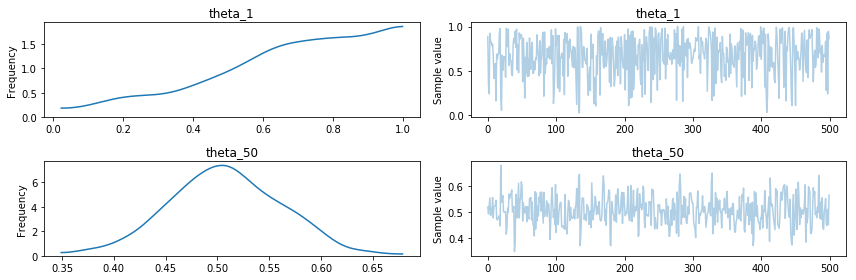

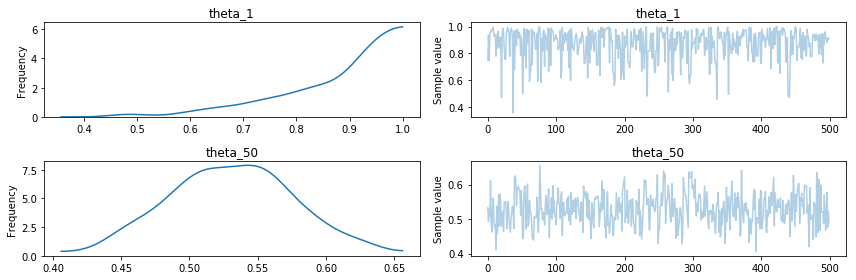

logp = -1.9115, ||grad|| = 4.26e-05: 100%|██████████| 25/25 [00:00<00:00, 139.65it/s] 


{'theta_1_logodds__': array(13.934859896165177), 'theta_50': array(0.5288461538461537), 'theta_50_logodds__': array(0.11551288712184422), 'theta_1': array(0.9999991125030779)}
mean_2: 0.528301886792
mean_50: 0.875


Assigned NUTS to theta_1_logodds__
Assigned NUTS to theta_50_logodds__
Assigned Metropolis to extra_coin
Assigned Metropolis to extra_coin_50
 92%|█████████▏| 460/501 [00:01<00:00, 455.06it/s]/home/karamchand/.local/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:429: UserWarning: Chain 0 contains only 1 samples.
  % (self._chain_id, n))
100%|██████████| 501/501 [00:01<00:00, 458.45it/s]


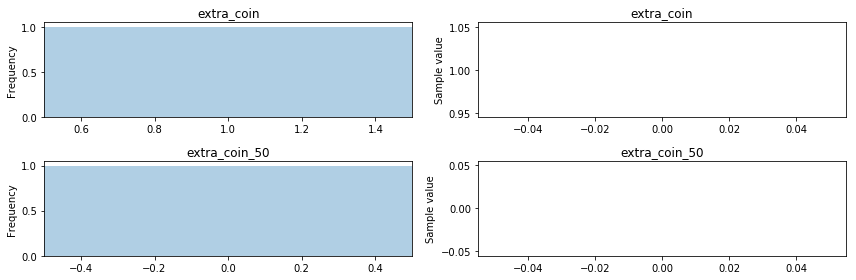

In [4]:
import pymc3 as pm
import numpy as np

my_model = pm.Model()
with my_model:
    theta = pm.Beta("theta_1", 1, 1)
    theta_50 = pm.Beta("theta_50", 50, 50)
    
    posterior = pm.Binomial("posterior_1",n=6,p=theta,observed=6)
    posterior_50 = pm.Binomial("posterior_50",n=6,p=theta_50,observed=6)
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
    
    M = pm.find_MAP(model = my_model)
    print(M)
    print ("mean_2: " + str(56.0/106.0))
    print ("mean_50: " + str(7.0/8.0))
    
    ### Theta y theta50 se modificaron
    predict = pm.Binomial("extra_coin",n=1,p=theta)
    predict_50 = pm.Binomial("extra_coin_50",n=1,p=theta_50)
    trace_2 = pm.sample(1)
    _ = pm.traceplot(trace_2, varnames = ["extra_coin", "extra_coin_50"])
    plt.show()

### 4

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 87%|████████▋ | 870/1000 [00:00<00:00, 1236.33it/s]/home/karamchand/.local/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.888950397842, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 1000/1000 [00:00<00:00, 1253.41it/s]


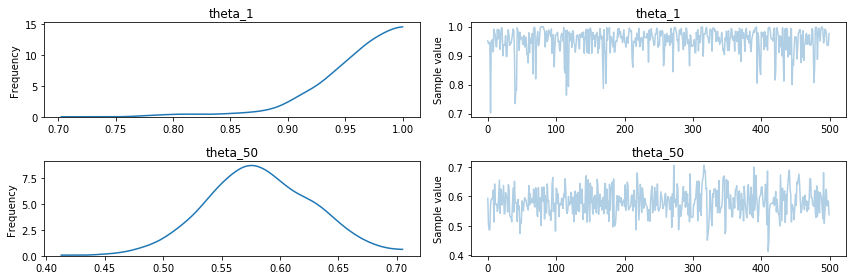

logp = -10.086, ||grad|| = 0.001355: 100%|██████████| 28/28 [00:00<00:00, 1894.45it/s]  


{'theta_1_logodds__': array(17.94575215904451), 'theta_50': array(0.5847456963243888), 'theta_50_logodds__': array(0.3422859330825544), 'theta_1': array(0.9999999839210065)}
mean_2: 0.583333333333
mean_50: 0.954545454545


Assigned NUTS to theta_1_logodds__
Assigned NUTS to theta_50_logodds__
Assigned Metropolis to extra_coin
Assigned Metropolis to extra_coin_50
100%|██████████| 501/501 [00:01<00:00, 468.41it/s]


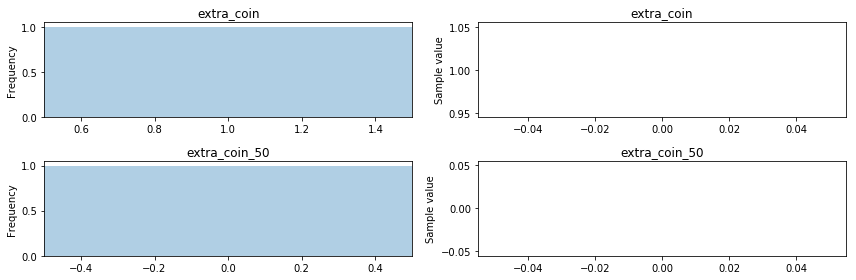

In [5]:
my_model = pm.Model()
with my_model:
    theta = pm.Beta("theta_1", 1, 1)
    theta_50 = pm.Beta("theta_50", 50, 50)
    
    posterior = pm.Binomial("posterior_1",n=20,p=theta,observed=20)
    posterior_50 = pm.Binomial("posterior_50",n=20,p=theta_50,observed=20)
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
    
    M = pm.find_MAP(model = my_model)
    print(M)
    print ("mean_2: " + str(70.0/120.0))
    print ("mean_50: " + str(21.0/22.0))
    
    ### Theta y theta50 se modificaron
    predict = pm.Binomial("extra_coin",n=1,p=theta)
    predict_50 = pm.Binomial("extra_coin_50",n=1,p=theta_50)
    trace_2 = pm.sample(1)
    _ = pm.traceplot(trace_2, varnames = ["extra_coin", "extra_coin_50"])
    plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1248.62it/s]


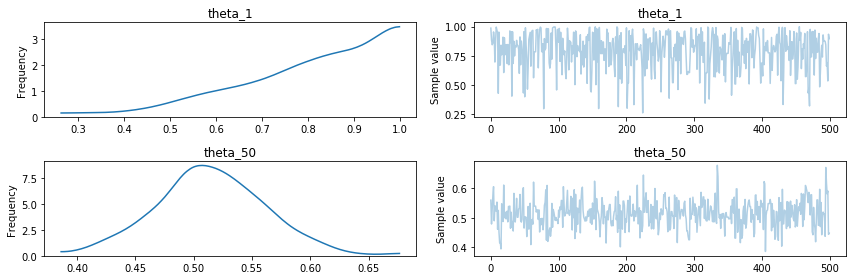

logp = 0.039371, ||grad|| = 4.0441e-05: 100%|██████████| 25/25 [00:00<00:00, 2528.27it/s]  


{'theta_1_logodds__': array(13.29373464621897), 'theta_50': array(0.5148514851485149), 'theta_50_logodds__': array(0.05942342047080077), 'theta_1': array(0.9999983149854028)}
mean_2: 0.514563106796
mean_50: 0.8

Assigned NUTS to theta_1_logodds__
Assigned NUTS to theta_50_logodds__
Assigned Metropolis to extra_coin
Assigned Metropolis to extra_coin_50
100%|██████████| 501/501 [00:01<00:00, 447.25it/s]


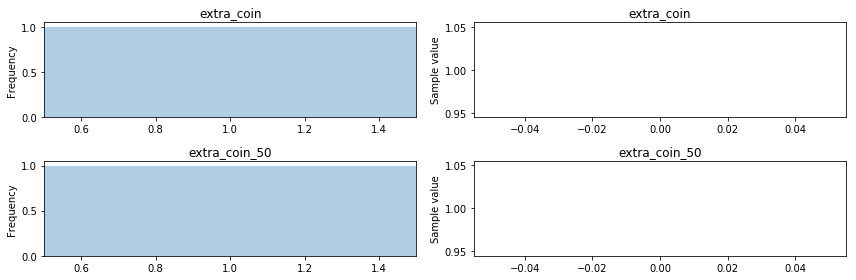

In [19]:
my_model = pm.Model()
with my_model:
    theta = pm.Beta("theta_1", 1, 1)
    theta_50 = pm.Beta("theta_50", 50, 50)
    
    posterior = pm.Binomial("posterior_1",n=3,p=theta,observed=3)
    posterior_50 = pm.Binomial("posterior_50",n=3,p=theta_50,observed=3)
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
    
    M = pm.find_MAP(model = my_model)
    print(M)
    print ("mean_2: " + str(53.0/103.0))
    print ("mean_50: " + str(4.0/5.0))
    
    ### Theta y theta50 se modificaron
    predict = pm.Binomial("extra_coin",n=1,p=theta)
    predict_50 = pm.Binomial("extra_coin_50",n=1,p=theta_50)
    trace_2 = pm.sample(1)
    _ = pm.traceplot(trace_2, varnames = ["extra_coin", "extra_coin_50"])
    plt.show()

Los prior con betas más altos representan una suposición más fuerte en el sentido de que son menos afectados por los siguientes tiros. Asumen un conocimiento mayor del contexto, en este caso, de tiradas anteriores de la moneda. En cambio, los prior con betas bajos no asumen mucha información previa. 

El modelo es útil para representar casos en los que partimos de asumir ciertas caracteristicas sobre la moneda, para determinar cuánta confianza le queremos dar a estas asunciones. Cuando no se tiene mucha información previa se comporta similarmente a un modelo frecuentista, en el que la probabilidad de obtener n caras en n tiros es $1/2^n$.

En definitiva, el modelo bayesiano parece permitirnos mayor libertad con respecto a la información que

### 5
Consideramos que una moneda puede estar cargada a partir del 4º tiro seguido que sale lo mismo. Probando valores para los parámetros de beta encontramos que nuestro prior se corresponde con un Beta(4, 4). Agregando 3 caras no se desvía demasiado, pero agregando 4 la curva se mueve para la derecha.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1510.05it/s]


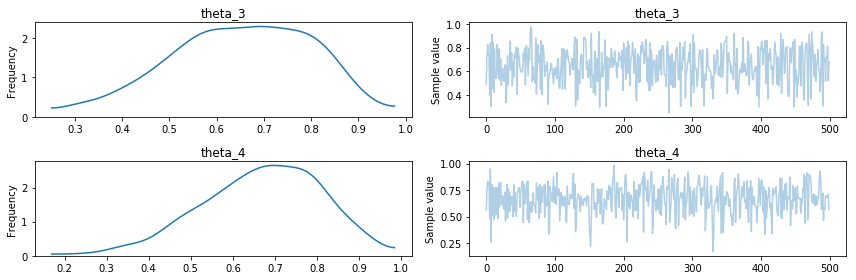

In [18]:
my_model = pm.Model()
with my_model:
    theta_3 = pm.Beta("theta_3", 4, 4)
    theta_4 = pm.Beta("theta_4", 4, 4)
    
    posterior_3 = pm.Binomial("posterior_3",n=3,p=theta_3,observed=3)
    posterior_4 = pm.Binomial("posterior_4",n=4,p=theta_4,observed=4)
    
    trace = pm.sample(500)
    _ = pm.traceplot(trace)
    plt.show()
